# Learning Python: things to remember

### The basic imports:

In [1]:
##Set up matplotlib for display in the browser:
%matplotlib inline

##Very most basic/standard imports:
import matplotlib.pyplot as plt
import numpy as np

##If you read FITS or ascii tables, these are necessary:
from astropy.io import fits
from astropy.io import ascii

##Automatic unit tracking...maybe?
import astropy.units as u

##Module containing a lot of standard stats packages:
from scipy import stats

### Arrays:

The equivalent of `fltarr` is `np.zeros`.

In [2]:
np.zeros((2,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

If you want the equivalent of `findgen`, then use `np.arange`. This can also be used to create arrays that go from any value to another in arbitrary steps.

In [3]:
a=np.arange(10)  ##This evidently produces integer arrays.
b=np.arange(5,10,0.5) # Populate an array from [5,10) in steps of 0.5.
a,b

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5]))

**N.B.** The upper limit given to `np.arange` is treated as an open limit. That is, `np.arange(10)` doesn't go to 10, but one step before it in the sequence.

You can also *reshape* these arrays on the fly:

In [13]:
a=np.arange(6)
a.reshape(3,2)

array([[0, 1],
       [2, 3],
       [4, 5]])

### Creating structure-like quantities:

Lets create a variable to hold names and heights of individuals using the `np.zeros` function. Then we'll do some testing to find individuals between 65 and 70 inches height.

In [17]:
## Note the use of the trailing comma after 10 to make it 
##   an adjustable length variable!!
temp=np.zeros((10,),dtype=[('name',str),('height',float)])

temp['height']=np.random.random_sample(10)*22.+60. 
temp

array([('',  72.23672282), ('',  69.99504103), ('',  77.61875753),
       ('',  67.86907412), ('',  65.64647042), ('',  73.1416339 ),
       ('',  62.06875542), ('',  60.22929345), ('',  76.42293143),
       ('',  66.15617451)],
      dtype=[('name', '<U'), ('height', '<f8')])

In [18]:
hh=((temp['height'] > 65) & (temp['height'] < 72)) ## Like IDL's where
temp['height'][hh]

array([ 69.99504103,  67.86907412,  65.64647042,  66.15617451])

Now let's plot a histogram of the data.

Text(0.5,0,'Height (inches)')

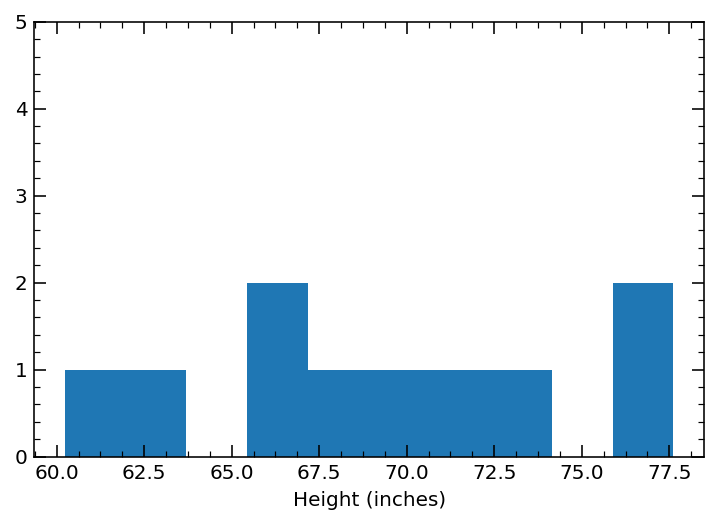

In [20]:
plt.hist(temp['height'],histtype='stepfilled')
plt.ylim([0,5]) 
plt.xlabel('Height (inches)')

## Data types:
`Numpy` includes some nice codes that act like the IDL `fltarr()` command.

In [21]:
print(np.zeros(10))
print(np.zeros([2,3]))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[ 0.  0.  0.]
 [ 0.  0.  0.]]


It also extends this to filling an array with 1s.

In [22]:
temp = np.ones(10)+0.3
temp[5:10]+=0.3
temp

array([ 1.3,  1.3,  1.3,  1.3,  1.3,  1.6,  1.6,  1.6,  1.6,  1.6])

These commands by default produce float arrayNow let's look at how to convert that array into an integer array:

In [23]:
temp.astype(int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Note that it didn't *round* the decimals, just dropped them altogether. To do this with a rounding ahead of time:

In [24]:
(np.round(temp)).astype(int)

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

We could also have created an integer array of zeros or ones initially:

In [25]:
print(np.ones(10,dtype=int))
print(np.zeros(10,dtype=int))

[1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0]
